In [67]:
import pandas as pd
import numpy as np

In [68]:
df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [69]:
df.head(145)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [71]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [72]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


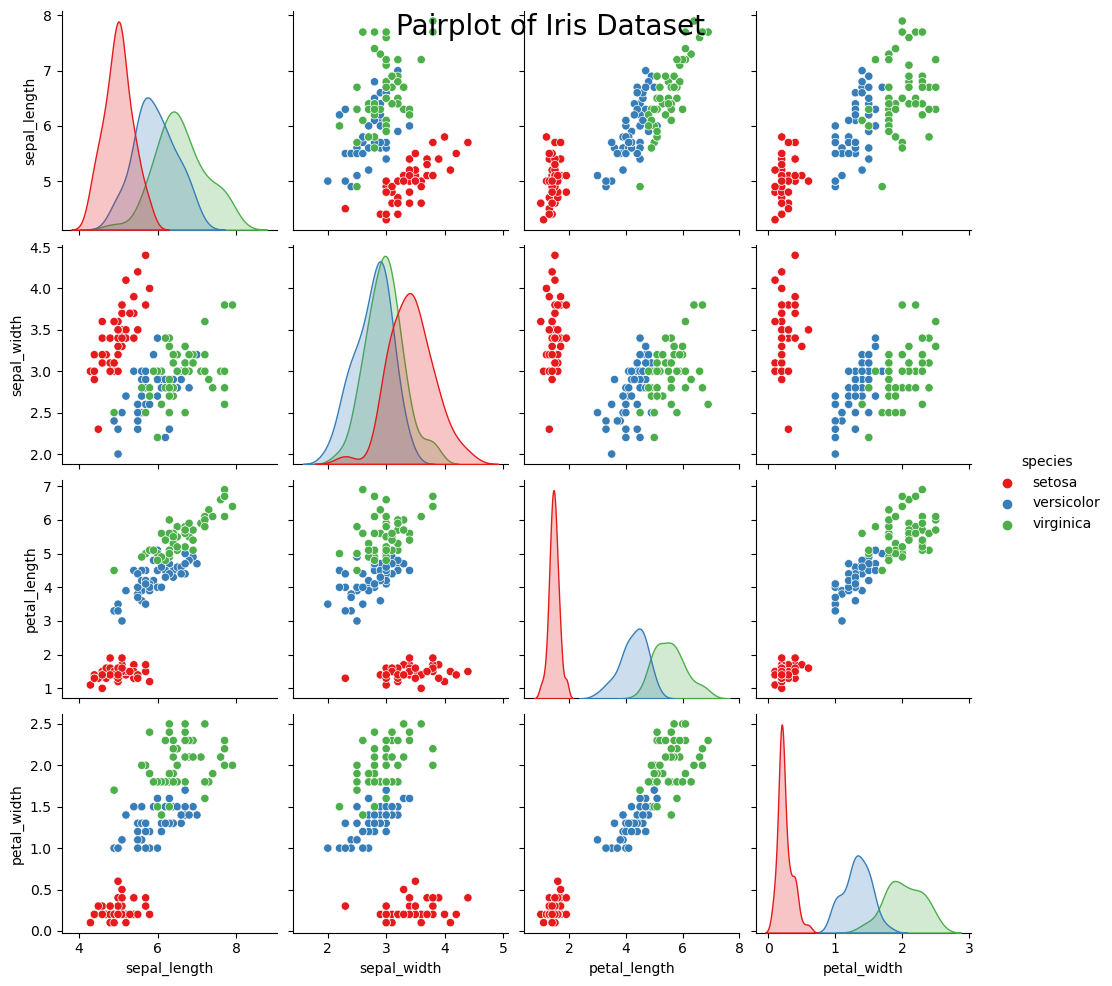

In [74]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species", palette="Set1")

# Add a title
plt.suptitle("Pairplot of Iris Dataset", size=20)

# Show the plot
plt.show()

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
X= df.iloc[:,0:4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [77]:
Y = df.iloc[:,-1]
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [79]:
label_encoder = LabelEncoder()

label = label_encoder.fit_transform(Y)

Y= label_encoder.transform(Y)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
reg = LogisticRegression()

In [83]:
reg.fit(X_train,Y_train)

LogisticRegression()

In [84]:
y_pred=reg.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

accuracy = accuracy_score(Y_test,y_pred)
ConfusionMatrix=confusion_matrix(Y_test,y_pred)
#Precision = precision_score(Y_test,y_pred)
#Recall = recall_score(Y_test,y_pred)
#F1Score = f1_score(Y_test,y_pred)

In [86]:
accuracy

0.9666666666666667

In [87]:
ConfusionMatrix

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  0,  8]])

In [ ]:
from sklearn.linear_model import LinearRegression

In [100]:
lr= LinearRegression()

In [101]:
lr.fit(X_train,Y_train)

LinearRegression()

In [102]:
y_predlr = lr.predict(X_test)

In [106]:
from sklearn.metrics import r2_score

In [107]:
r2score = r2_score(Y_test,y_predlr)

In [108]:
r2score

0.9370544014980828